In [1]:
import seaborn
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.collocations import *

from wordcloud import WordCloud

from collections import Counter

try:
    import data_loader as dl
except ImportError:
    dl = None
    raise ImportError('data_loader' + ' not imported')

try:
    import constants as c
except ImportError:
    c = None
    raise ImportError('constants' + ' not imported')



In [2]:
import tensorflow as tf

# Variables

In [3]:
N_STRINGS = c.N_STRINGS
PATH = c.PATH
N_MOST_COMMON = c.N_MOST_COMMON

# Import

In [4]:
d_l = dl.DataLoader(PATH)

In [5]:
d_l.load()

In [6]:
ds_split = d_l.prepare()

In [7]:
ds_split

<ParallelMapDataset shapes: (None,), types: tf.string>

In [8]:
for x in ds_split.take(6).__iter__():
    tf.print(x)

["valkyria" "chronicles" "iii"]
["senj" "no" "valkyria" ... "chronicles" "japanese" "lit"]
["valkyria" "of" "the" ... "the" "playstation" "portable"]
["released" "in" "january" ... "the" "valkyria" "series"]
["employing" "the" "same" ... "unit" "calamaty" "raven"]
["the" "game" "began" ... "valkyria" "chronicles" "ii"]


# Frequencies

In [19]:
def cardinality_of_words(dataset):
    
    cardinalities = {}
    
    for seq in dataset.__iter__():
        for word in seq:
            word = word.numpy()
            if word not in cardinalities:
                cardinalities[word] = 1
            else:
                cardinalities[word] += 1
    
    return cardinalities

            

In [10]:
cardinalities = cardinality_of_words(ds_split)

KeyboardInterrupt: 

In [ ]:
sorted_cardinalities = {k: v for k, v in sorted(cardinalities.items(), key = lambda item: item[1], reverse = True)}

In [ ]:
sorted_cardinalities

In [ ]:
common_words = list(sorted_cardinalities.items())[:N_MOST_COMMON]

In [ ]:
common_words[:6]

[(b'the', 130769),
 (b'of', 57032),
 (b'and', 50736),
 (b'in', 45017),
 (b'to', 39522),
 (b'a', 36545)]

In [ ]:
words = [w[0] for w in common_words]
counts = [w[1] for w in common_words]

## First Plot

Text(0.5, 1.0, 'Most Common Words in this wikipedia samples')

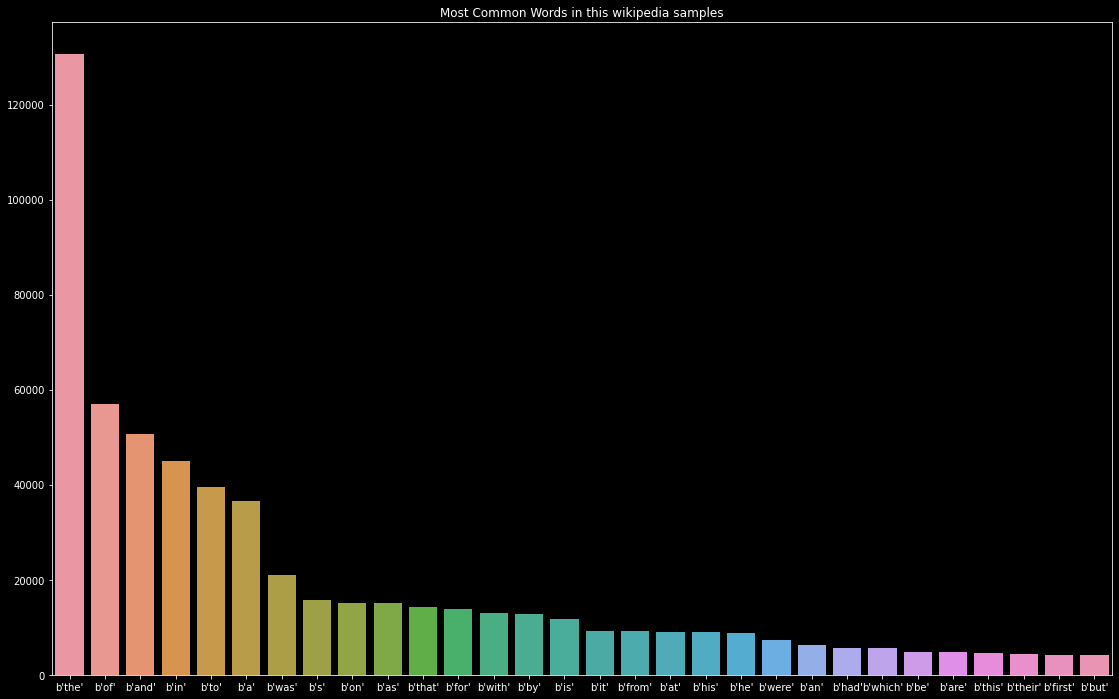

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(19, 12))

seaborn.barplot(x = words, y = counts)
plt.title('Most Common Words in this wikipedia samples')

So "the" is the most used word, this kind of words (stopwords) will be removed in the next part

# Deleting stopwords with nltk

In [9]:
combined_strings_without_stopwords_split = d_l.without_stopwords(N_STRINGS)

In [12]:
combined_strings_without_stopwords_split[:6]

['valkyria', 'chronicles', 'iii', 'senj', 'valkyria', 'unrecorded']

cardinality_of_words can be replaced with Counter from collections

In [13]:
cardinalities = Counter(combined_strings_without_stopwords_split)

In [14]:
words = [cardinality[0] for cardinality in cardinalities.most_common(N_MOST_COMMON)]
counts = [cardinality[1] for cardinality in cardinalities.most_common(N_MOST_COMMON)]

Text(0.5, 1.0, 'Most Common Words in this wikipedia samples')

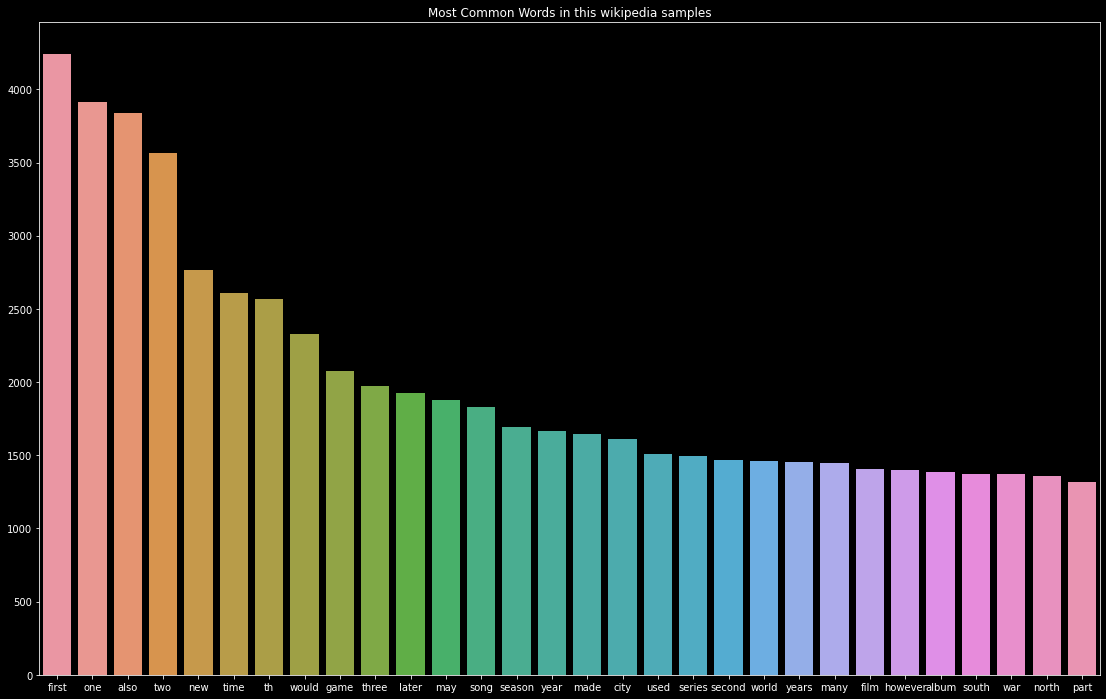

In [15]:
plt.style.use('dark_background')
plt.figure(figsize=(19, 12))

seaborn.barplot(x = words, y = counts)
plt.title('Most Common Words in this wikipedia samples')

# Wordcloud

In [16]:
combined_strings = d_l.combine_first_strings(N_STRINGS)

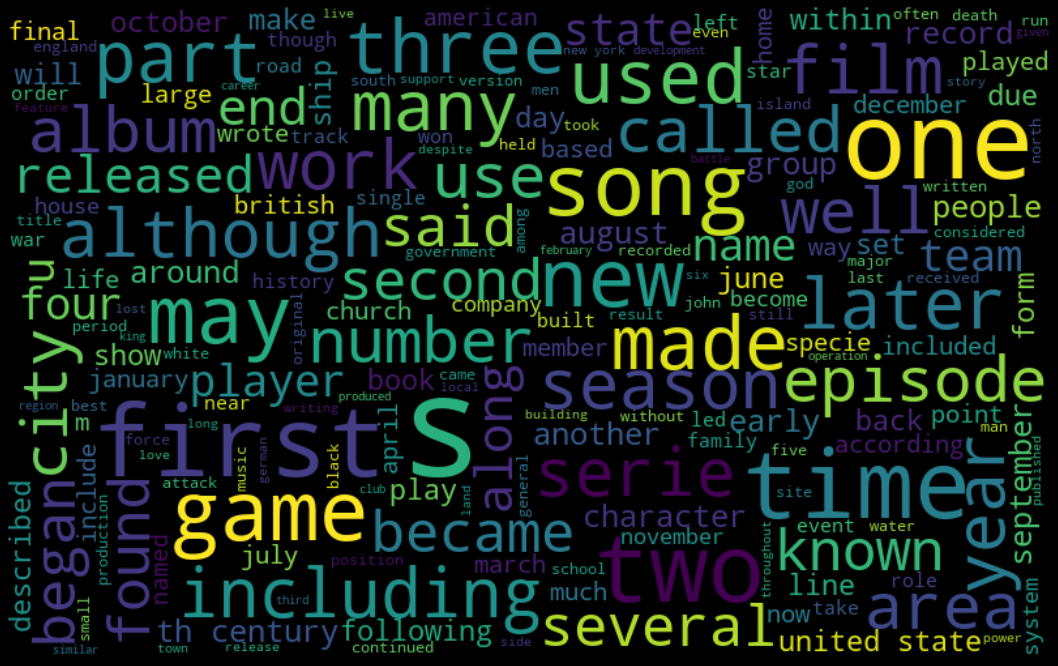

In [17]:
wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(combined_strings)
plt.figure(figsize=(19, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

# Word2vec embedding

In [68]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import numpy as np

In [10]:
sentences_list = d_l.list_of_sentences_without_stopwords(N_STRINGS)

In [11]:
len(sentences_list)

81914

In [12]:
model = Word2Vec(sentences=sentences_list, vector_size=100, window=5, min_count=1, workers=4)

In [13]:
model.save('../models/word2vec.model')


In [14]:
model.wv['king']

array([ 0.05412203,  1.0725479 ,  0.589632  , -0.2766097 , -0.25654736,
       -0.9250471 , -0.06583002,  0.6226809 , -0.38124764, -0.41802835,
       -0.00635997, -1.380608  ,  0.3967976 ,  0.9578141 ,  0.10944588,
       -1.3403755 ,  0.41622958, -0.30097494, -0.3724677 , -1.4846486 ,
       -0.07914398, -0.4230947 ,  0.5273387 ,  0.2985421 , -0.7742208 ,
        0.18988222, -0.40733072, -0.13728951, -1.3769647 , -0.33903316,
       -0.50004953,  1.0628028 , -1.1597682 , -0.35717216, -1.2356645 ,
       -0.36877266,  0.24493584, -0.08713706, -0.3906638 , -1.7438536 ,
       -0.31219092, -0.8935619 , -0.6384548 , -0.5900795 , -0.31622142,
       -0.16203457, -1.3086104 , -0.61378413,  0.12358231,  0.7809816 ,
        0.3158503 , -1.1635258 , -0.22549337,  0.17752962, -0.6360615 ,
        0.11958601,  0.1821606 , -0.52545244, -0.8514221 ,  0.02137244,
        0.299486  , -0.60211706, -0.4753344 , -0.1117263 , -1.3242127 ,
       -0.03747853, -1.1634495 , -0.54046196, -0.3930763 , -0.13

In [20]:
model.wv.most_similar(positive=['bad'])

[('noting', 0.9977228045463562),
 ('lessing', 0.9975503087043762),
 ('definitely', 0.9974841475486755),
 ('feels', 0.9966393113136292),
 ('listen', 0.9965689778327942),
 ('pretty', 0.9964260458946228),
 ('talk', 0.9962132573127747),
 ('nice', 0.9961918592453003),
 ('sing', 0.9961798787117004),
 ('actually', 0.9961046576499939)]

In [45]:
mod = Word2Vec(window=10, min_count=50, workers=4, vector_size = 100)

In [46]:
mod.build_vocab(sentences_list, progress_per = 100)

In [47]:
mod.epochs

5

In [48]:
mod.corpus_count

81914

In [49]:
mod.train(sentences_list, total_examples = mod.corpus_count, epochs = mod.epochs)

(3305936, 4880740)

In [64]:
model.wv.most_similar(positive=['mother'])

[('stepson', 0.9882565140724182),
 ('husband', 0.987542986869812),
 ('personal', 0.9864121675491333),
 ('zhou', 0.9835262298583984),
 ('everyday', 0.9832322597503662),
 ('learn', 0.9830282330513),
 ('care', 0.9826613068580627),
 ('relationship', 0.9823541045188904),
 ('decides', 0.9821540713310242),
 ('parents', 0.9814055562019348)]

In [62]:
model.wv.index_to_key[:5]

['first', 'one', 'also', 'two', 'new']

In [70]:
words_embedding = model.wv[model.wv.index_to_key]

In [71]:
pca = PCA(n_components=2)

In [72]:
words_embedding_dim_2 = pca.fit_transform(words_embedding)

In [73]:
words_embedding_dim_2.shape

(62150, 2)

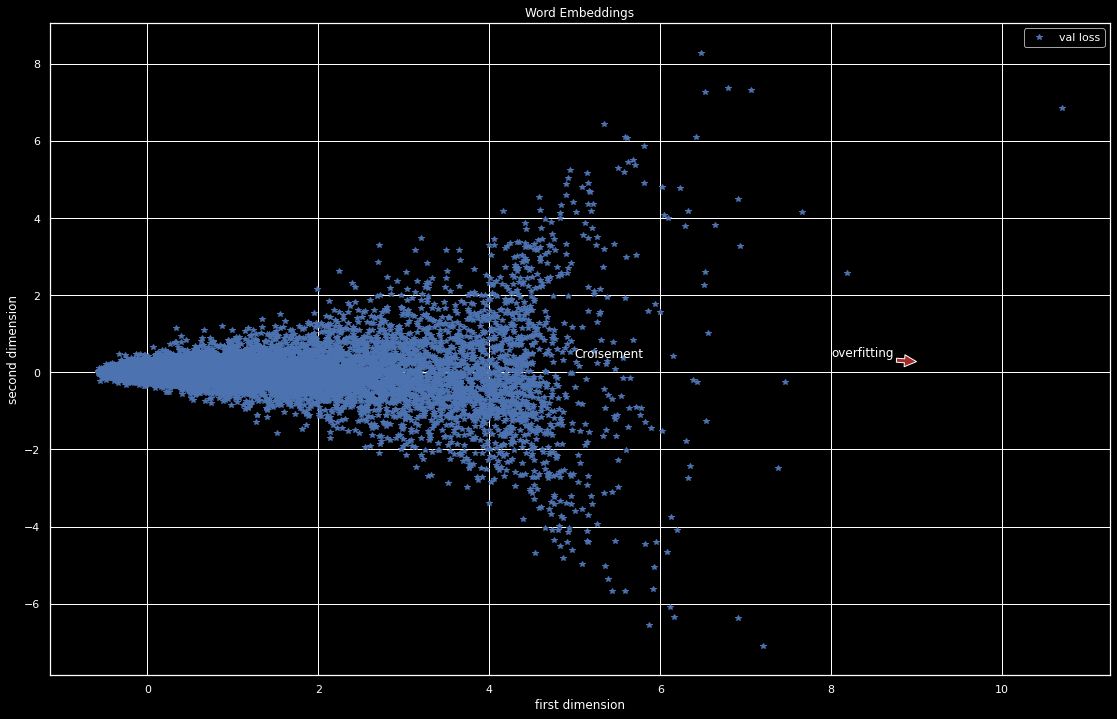

In [82]:
seaborn.set()
plt.style.use('dark_background')
plt.figure(figsize = (19, 12))

plt.plot(words_embedding_dim_2[:,0], words_embedding_dim_2[:,1], 'b', label = 'words', linewidth=0, marker = '*')

plt.title('Word Embeddings')
plt.xlabel('first dimension')
plt.ylabel('second dimension')
plt.text(5, 0.37, 'Croisement')
plt.annotate('overfitting', xy=(9, 0.28), xytext=(8, 0.4), 
arrowprops={'facecolor':'brown', 'shrink':0.01} )
plt.legend()

plt.grid(True)

plt.show()